In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from quantum_dynamics import Dynamics
import numpy as np
import numpy.linalg as LA
from ions import Chain
from ion_trap import IonTrap
import matplotlib.pylab as plt  
from matplotlib.pylab import *
from laser import *
%pylab inline

/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['power', 'fft', 'draw_if_interactive', 'linalg', 'random', 'info']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
omegax = 1.8e6
omegaz = 160.e3
N = 5
chain = Chain(N, 2)
dummy_trap = IonTrap( omegax , omegaz, potential_config='positions_given')
dummy_trap.load(chain, 2.*zpositions)
#zpositions =   np.array( chain.get_zpositions() )
#harmonic potential couplings:
couplings_harmonic = chain.get_couplings()

#Correction for x^2 * z^2 term:
omegax_gradient_at_100microns = 0#2*np.pi * 100.e3/(1.e-6)
def get_radial_freq_corrections(omegax_gradient_at_100microns):
    
    delta_omegax = omegax_gradient_at_100microns * zpositions**2/(2*100.e-6)

    return delta_omegax 

couplings_with_x2z2_correction = np.array( [ row for row in couplings_harmonic ])
radial_corrections = get_radial_freq_corrections(omegax_gradient_at_100microns)

for i in range(N):
    couplings_with_x2z2_correction[i][i] += radial_corrections[i]



NameError: name 'Chain' is not defined

In [17]:
chain.get_zpositions()

[-5.2604184628008818e-05,
 -2.4812641452103204e-05,
 0.0,
 2.4812581088129799e-05,
 5.2604184628008818e-05]

In [19]:
#Testing state initialization:
#15 ions:
#motional_state = (1, 3, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,3,0)
#10 ions:
#motional_state = (1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
motional_state = (1, 0, 0, 0, 0,)

lasers = []
#pulse1 = Pulse( ion_num = 0, sideband_num = 1, intensity = 2*np.pi* 100e3, phase = 2*np.pi* 0 , duration = 8.e-6 )
chain.harmonic_couplings = couplings_with_x2z2_correction

time_precision = 2.e-6
dyn = Dynamics(chain, lasers, time_precision)


chain.set_pure_motional_state( motional_state )
#dyn.add_pulse( pulse1 )

#dyn.construct_free_hamiltonian()

In [20]:
observables = [ dyn.a[0].dag() * dyn.a[0], dyn.a[N-1].dag() * dyn.a[N-1] ]
time_interval = (0., 1000.e-6)
times = arange(time_interval[0],time_interval[1], time_precision)
dyn.evolve_qutip(time_interval, observables)


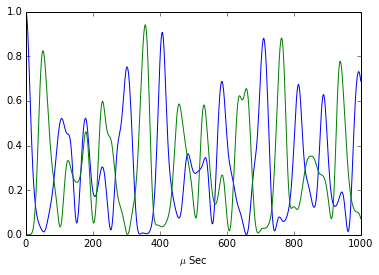

In [6]:
#plt.plot(times[0:200]*1.e6, dyn.expectations[0][0:200], times[0:200]*1.e6, dyn.expectations[1][0:200])
plt.plot(times*1.e6, dyn.expectations[0], times*1.e6, dyn.expectations[1])
plt.xlabel("$\mu$ Sec")
plt.show()
#Plot below with harmonic for 10 ions:

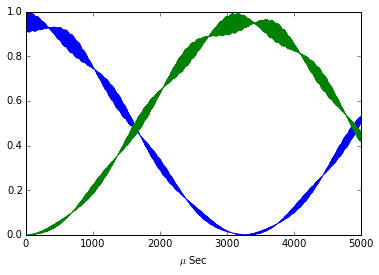

In [59]:
plt.plot(times*1.e6, dyn.expectations[0], times*1.e6, dyn.expectations[1])
plt.xlabel("$\mu$ Sec")
plt.savefig('../Data_Storage/CouplingEndIons-{}ions_InitiState%s-PhononPopulationAtEndIons-{:.2f}KHzAxial-WithX2Z2Term_20KHzPerMicronRadialGradientat100Microns.jpg'.format(N, omegaz*1.e-3)%str(motional_state), bbox_inches='tight')
plt.show()
#Plot below with corrections for 10 ions:

In [94]:
print(min(dyn.expectations[0][:100]), max(dyn.expectations[1][:100]))
print(list(dyn.expectations[1][:100]).index(max(dyn.expectations[1][:100])))
#print(list(dyn.expectations[1][:50]).index(max(dyn.expectations[1][:50])))
#print(max(dyn.expectations[1][900:1100]))

(0.0072364891733586317, 0.67971575708815934)
30


In [35]:
(sort(LA.eig(couplings_harmonic)[0])[::-1][1] - sort(LA.eig(couplings_harmonic)[0])[::-1][2])/(2*np.pi)

5978.6848553007658

In [30]:
1./2481

0.00040306328093510683

In [36]:
1./5979

0.00016725204883759825

In [76]:
radial_corrections/(2*np.pi)

array([ 69695.41935292,  37294.37273751,  17789.17936782,   6164.27817455,
          672.98861695,    672.98861695,   6164.27817455,  17789.17936782,
        37294.37273751,  69695.41935292])

In [4]:
LA.eig(couplings_harmonic)[1].T

array([[  1.32872669e-09,  -1.26593554e-07,   3.52910986e-06,
         -4.99144422e-05,   4.36128763e-04,  -2.61176686e-03,
          1.14097612e-02,  -3.78698272e-02,   9.81563940e-02,
         -2.02480740e-01,   3.36799084e-01,  -4.55587781e-01,
          5.03590514e-01,  -4.55587781e-01,   3.36799084e-01,
         -2.02480740e-01,   9.81563940e-02,  -3.78698272e-02,
          1.14097612e-02,  -2.61176686e-03,   4.36128763e-04,
         -4.99144422e-05,   3.52910986e-06,  -1.26593554e-07,
          1.32872669e-09],
       [ -1.28595157e-08,   1.02593834e-06,  -2.50632721e-05,
          3.10344655e-04,  -2.35948200e-03,   1.21565144e-02,
         -4.49113542e-02,   1.22899896e-01,  -2.52730981e-01,
          3.88583487e-01,  -4.29041484e-01,   2.89445110e-01,
          3.21217059e-15,  -2.89445110e-01,   4.29041484e-01,
         -3.88583487e-01,   2.52730981e-01,  -1.22899896e-01,
          4.49113542e-02,  -1.21565144e-02,   2.35948200e-03,
         -3.10344655e-04,   2.50632721e-05,

In [78]:
LA.eig(couplings_with_x2z2_correction)[1].T

array([[ 0.00072157, -0.01589277,  0.10858476, -0.34786373,  0.60576157,
        -0.60576157,  0.34786373, -0.10858476,  0.01589277, -0.00072157],
       [-0.65176222, -0.23591075, -0.11261147, -0.06634313, -0.04969275,
        -0.04969275, -0.06634313, -0.11261147, -0.23591075, -0.65176222],
       [ 0.66135293,  0.22712228,  0.09583882,  0.04129916,  0.01170796,
        -0.01170796, -0.04129916, -0.09583882, -0.22712228, -0.66135293],
       [-0.00366503,  0.06057911, -0.29101057,  0.55528325, -0.32138777,
        -0.32138777,  0.55528325, -0.29101057,  0.06057911, -0.00366503],
       [-0.01262102,  0.1527213 , -0.47946675,  0.38645845,  0.31189488,
        -0.31189488, -0.38645845,  0.47946675, -0.1527213 ,  0.01262102],
       [-0.03383762,  0.2904048 , -0.52054027, -0.09197194,  0.36755823,
         0.36755823, -0.09197194, -0.52054027,  0.2904048 , -0.03383762],
       [-0.07449066,  0.43445564, -0.31269258, -0.42131424, -0.17440499,
         0.17440499,  0.42131424,  0.31269258

In [88]:
2000000 - LA.eig(couplings_harmonic)[0][2:7]/(2*np.pi)

array([  1.42920351e+05,   1.13416768e+05,   8.66274162e+04,
        -2.09547579e-09,   9.92784207e+03])

In [98]:
1904640.89610327 - LA.eig(couplings_with_x2z2_correction)[0][2:7]/(2*np.pi)

array([ -1.45281065e+05,   7.18790200e+04,   3.45933074e+04,
        -2.32830644e-09,  -3.17204080e+04])

In [55]:
LA.eig(couplings_harmonic)[0][2] - LA.eig(couplings_harmonic)[0][1]

259873.96281674132

In [56]:
LA.eig(couplings_harmonic)[0][2] - LA.eig(couplings_harmonic)[0][3]

150260.73935631104

In [57]:
1./260

0.0038461538461538464

In [58]:
1./266

0.0037593984962406013

In [108]:
(1000./600)**.5 * 200

258.1988897471611

In [145]:
cd Data_Storage/

/home/trxw/Documents/dfr/codes/quantum_play/ion-trap-qsim/Data_Storage


In [171]:
2*np.pi/with_15ions_14_5KHzPerMic_couplings_with_x2z2_correction_with_200KHzAxial[0][N-1]

0.040079582087964243

In [167]:
LA.eig(with_15ions_14_5KHzPerMic_couplings_with_x2z2_correction_with_200KHzAxial)[1].T

array([[ -4.04565354e-06,   2.15332459e-04,  -3.33577457e-03,
          2.45320414e-02,  -1.03581739e-01,   2.76030169e-01,
         -4.88582221e-01,   5.89471157e-01,  -4.88609504e-01,
          2.76035864e-01,  -1.03577770e-01,   2.45309792e-02,
         -3.33566434e-03,   2.15342456e-04,  -4.04516737e-06],
       [  6.73424695e-01,   1.94582871e-01,   7.56016057e-02,
          3.48314590e-02,   1.83690847e-02,   1.11211887e-02,
          7.97663513e-03,   7.08869666e-03,   7.98393177e-03,
          1.11387878e-02,   1.84054010e-02,   3.49068570e-02,
          7.57718346e-02,   1.95021769e-01,   6.74991072e-01],
       [  6.75813935e-01,   1.93798048e-01,   7.40347537e-02,
          3.28004846e-02,   1.57871711e-02,   7.70364429e-03,
          3.19999396e-03,   8.25925773e-06,  -3.18130169e-03,
         -7.67756947e-03,  -1.57443370e-02,  -3.27192005e-02,
         -7.38583637e-02,  -1.93337334e-01,  -6.74255238e-01],
       [  2.71062331e-05,  -1.18863966e-03,   1.50189985e-02,
     

In [166]:
with_15ions_7KHzPerMic_couplings_with_x2z2_correction_with_170KHzAxial  = couplings_with_x2z2_correction

In [181]:
couplings_with_x2z2_correction[4][5]/(2*np.pi)

55276.442944540067

In [184]:
max(zpositions)-min(zpositions)

7.4670165047586019e-05

In [28]:
pwd

u'/home/trxw/Documents/dfr/codes/quantum_play/ion-trap-qsim/Independent_Simulations'

In [36]:
plt.plot(range(N), sort(chain.harmonic_couplings)/(2*np.pi*1.e6), 'ro')
plt.show()

In [44]:
(max([chain.harmonic_couplings[i][i] for i in range(N)])-min([chain.harmonic_couplings[i][i] for i in range(N)]))/(2*np.pi)

242908.2878852133

In [48]:
omegaz

170000.0

In [60]:
(17./20)**2 * 3200

2311.9999999999995

In [149]:
spectrum_amp_x2z2 = (LA.eig(couplings_with_x2z2_correction)[1][0])**2
spectrum_x2z2 = LA.eig(couplings_with_x2z2_correction)[0]

In [146]:
spectrum_amp_harmonic = (LA.eig(chain.get_couplings())[1][1])**2
spectrum_harmonic = LA.eig(chain.get_couplings())[0]

In [150]:
#spectrum_x2z2 = np.array([LA.eig(chain.get_couplings())[0][j] for j in [0,1,3,4] ])/(2*np.pi*1.e6)
#spectrum_x2z2 = LA.eig(np.array([couplings_with_x2z2_correction[0][j] for j in [0,1,3,4]])/(2*np.pi*1.e6))
spectrum_amp_x2z2

array([  4.99444839e-01,   4.99510624e-01,   5.54316450e-04,
         4.89306208e-04,   8.44080875e-07,   7.02259027e-08])

In [148]:
#spectrum_harmonic = np.array([LA.eig(chain.get_couplings())[0][j] for j in [1,2,3,4,5] ])/(2*np.pi*1.e6)
spectrum_amp_harmonic

array([ 0.08725695,  0.31557759,  0.29490544,  0.16666667,  0.11783761,
        0.01775574])

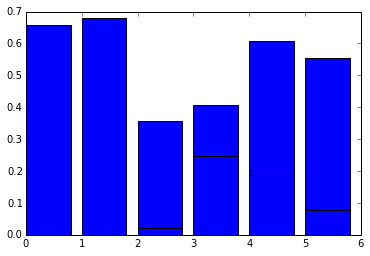

In [101]:
bar1=plt.bar(range(len(spectrum_harmonic)), abs(spectrum_amp_harmonic))
bar2=plt.bar(range(len(spectrum_x2z2)), abs(spectrum_amp_x2z2) )

In [56]:
(0.6/0.8)**0.5

0.8660254037844386

In [144]:
chain.get_positions()[0]-chain.get_positions()[5]

-6.07343063867137e-05

In [77]:
max(spectrum_harmonic)-min(spectrum_harmonic)

1.4404123258219275e-07

In [79]:
chain.get_couplings()[0][1]/(2*np.pi)

19845.436434380073

In [136]:
(max(spectrum_harmonic)-min(spectrum_harmonic))/(2*np.pi)

115227.26118746205

In [137]:
(max(spectrum_x2z2)-min(spectrum_x2z2))/(2*np.pi)

377301.56664147164

In [152]:
spectrum_x2z2/(2*np.pi*1.e6)

array([ 2.24860749,  2.24834974,  1.92064787,  1.91814539,  1.79318579,
        1.75965947])

In [13]:
plt.plot(range(N), abs(LA.eig(couplings_harmonic)[1][12]), 'b')
plt.show()

In [78]:
def spectrum( couplings, ion_num ):
    plt.plot( LA.eig(couplings)[0]/(2*np.pi*1.e6), (LA.eig(couplings)[1][ion_num-1])**2, 'ro')
    plt.show()

In [79]:
ion_num = 1
spectrum( couplings_harmonic,ion_num )

In [28]:
ion_num = 2
spectrum( couplings_harmonic,ion_num )

In [30]:
plot(LA.eig(couplings_harmonic)[1][14]**2)
plt.show()

In [32]:
plt.plot(couplings_harmonic[0]/(2*np.pi*1.e6))
plt.show()

In [63]:
plt.plot(range(N), sort(couplings_harmonic[0]/(2*np.pi*1.e6)), 'ro')
plt.show()

In [70]:
(couplings_harmonic[0]/(2*np.pi*1.e6))>1.e-2

array([ True, False, False, False, False], dtype=bool)

In [77]:
plt.plot(LA.eig(couplings_harmonic)[0]/(2*np.pi*1.e6), 'ro')
plt.show()

In [ ]:
def get_spectrum(couplings, ion_num, threshold=0.1)
    eigvs = LA.eig(couplings_harmonic)[0]
    eigvecs = LA.eig(couplings_harmonic)[1]
    spect = [[],[]] #np.zeros( (2,len(eigvs)) )
    eignum = []
    for i in range(len(eigvs)):
        if eigvecs[i]>threshold:
            eignum.append(i)
            spect[0].append(eigvs[i])
            

In [87]:
plt.plot( LA.eig(couplings_harmonic)[0]/(2*np.pi*1.e6), (LA.eig(couplings_harmonic)[1][0])**2, 'go')
plt.plot( LA.eig(couplings_harmonic)[0]/(2*np.pi*1.e6), (LA.eig(couplings_harmonic)[1][8])**2, 'ro')

plt.show()

In [4]:
raise Exception("Z position of ions must be given as a list with length equal to\n number of ions")


Exception: Z position of ions must be given as a list with length equal to
 number of ions